In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
! ls csv

ridge_benchmark.csv			      ridge_benchmark_opu_400_500.csv
ridge_benchmark_first.csv		      ridge_benchmark_rbf.csv
ridge_benchmark_opu_300_600_700_no_dummy.csv


In [14]:
opu_df = pd.read_csv('csv/ridge_benchmark_opu.csv')

In [18]:
opu_df.head()

,activation,alpha,dummy_input,exposure_us,inversion_warning,output_dim,seed,test_score,training_time
0,NaN,0.0,1.0,400.0,0.0,10.0,0.0,0.5329,0.031044
1,NaN,0.0,1.0,400.0,0.0,10.0,1.0,0.5088,0.030055
2,NaN,0.0,1.0,400.0,0.0,10.0,2.0,0.5636,0.028479
3,NaN,0.0,1.0,400.0,0.0,10.0,3.0,0.5577,0.027243
4,NaN,0.0,1.0,400.0,0.0,10.0,4.0,0.5522,0.027955


In [19]:
rbf_df = pd.read_csv('csv/ridge_benchmark_rbf.csv')

In [20]:
rbf_df.head()

,alpha,dummy_input,framework,inversion_warning,kernel,log_lengthscale_init,output_dim,seed,test_score,training_time
0,0.0,0.0,pytorch,0.0,rbf,auto,10.0,0.0,0.5575,0.665011
1,0.0,0.0,pytorch,0.0,rbf,auto,10.0,1.0,0.5251,0.055168
2,0.0,0.0,pytorch,0.0,rbf,auto,10.0,2.0,0.5682,0.081761
3,0.0,0.0,pytorch,0.0,rbf,auto,10.0,3.0,0.5769,0.034373
4,0.0,0.0,pytorch,0.0,rbf,auto,10.0,4.0,0.5331,0.034812


In [45]:
syn_df = pd.read_csv('csv/ridge_benchmark_first.csv')

In [46]:
syn_df.head()

,activation,alpha,bias,dummy_input,framework,inversion_warning,kernel,output_dim,seed,test_score,training_time
0,NaN,0.0,1.0,0.0,pytorch,0.0,opu,10.0,0.0,0.5381,2.167416
1,NaN,0.0,0.0,0.0,pytorch,0.0,opu,10.0,0.0,0.5381,0.037516
2,sqrt,0.0,1.0,0.0,pytorch,0.0,opu,10.0,0.0,0.5510,0.043716
3,sqrt,0.0,0.0,0.0,pytorch,0.0,opu,10.0,0.0,0.5512,0.028360
4,cos,0.0,1.0,0.0,pytorch,0.0,opu,10.0,0.0,0.5084,0.060227


In [23]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [24]:
def plot_misclassification_errors(dataframes, labels):
    
    plt.figure(figsize=(24,10))
    
    for label, dataframe in zip(labels, dataframes):
        x_values = sorted(dataframe['output_dim'].unique())[9:]

        y_means = []
        y_stds = []

        for x_val in x_values:
            ys = (1 - dataframe.query('output_dim == "{}"'.format(x_val))['test_score'])
            y_means.append(ys.mean())
            y_stds.append(ys.std())
        
        plt.errorbar(x_values, y_means, y_stds, linestyle='dotted', marker='^', capsize=3, label=label)
    plt.legend(loc='upper right')
    plt.xlim((0, 10000))
    plt.xlabel('Output Dimension (D)')
    plt.ylabel('Classification Error on Fashion MNIST')
    plt.title('Error versus number of random projections')
    # plt.ylim((0.075, 0.25))
    plt.show()

In [32]:
df_opu_300 = opu_df.query('alpha == "0.0" & exposure_us == "300" & dummy_input=="0.0" & activation!="sqrt"')

In [33]:
df_opu_400 = opu_df.query('alpha == "0.0" & exposure_us == "400" & dummy_input=="0.0" & activation!="sqrt"')

In [34]:
df_opu_500 = opu_df.query('alpha == "0.0" & exposure_us == "500" & dummy_input=="0.0" & activation!="sqrt"')

In [35]:
df_opu_600 = opu_df.query('alpha == "0.0" & exposure_us == "600" & dummy_input=="0.0" & activation!="sqrt"')

In [36]:
df_opu_700 = opu_df.query('alpha == "0.0" & exposure_us == "700" & dummy_input=="0.0" & activation!="sqrt"')

In [47]:
rbf_df_0 = rbf_df.query('alpha == "0.0" & dummy_input=="0.0"')

In [48]:
df_syn_1 = syn_df.query('alpha == "0.0" & dummy_input=="0.0" & activation.isnull() & bias=="0.0"')

In [49]:
df_syn_2 = syn_df.query('alpha == "0.0" & dummy_input=="0.0" & activation=="sqrt" & bias=="0.0"')

In [50]:
df_syn_3 = syn_df.query('alpha == "0.0" & dummy_input=="0.0" & activation=="cos" & bias=="1.0"')

In [51]:
df_syn_1.head()

,activation,alpha,bias,dummy_input,framework,inversion_warning,kernel,output_dim,seed,test_score,training_time
1,NaN,0.0,0.0,0.0,pytorch,0.0,opu,10.0,0.0,0.5381,0.037516
7,NaN,0.0,0.0,0.0,pytorch,0.0,opu,10.0,1.0,0.5376,0.050572
13,NaN,0.0,0.0,0.0,pytorch,0.0,opu,10.0,2.0,0.4906,0.035006
19,NaN,0.0,0.0,0.0,pytorch,0.0,opu,10.0,3.0,0.5434,0.060699
25,NaN,0.0,0.0,0.0,pytorch,0.0,opu,10.0,4.0,0.4764,0.051601


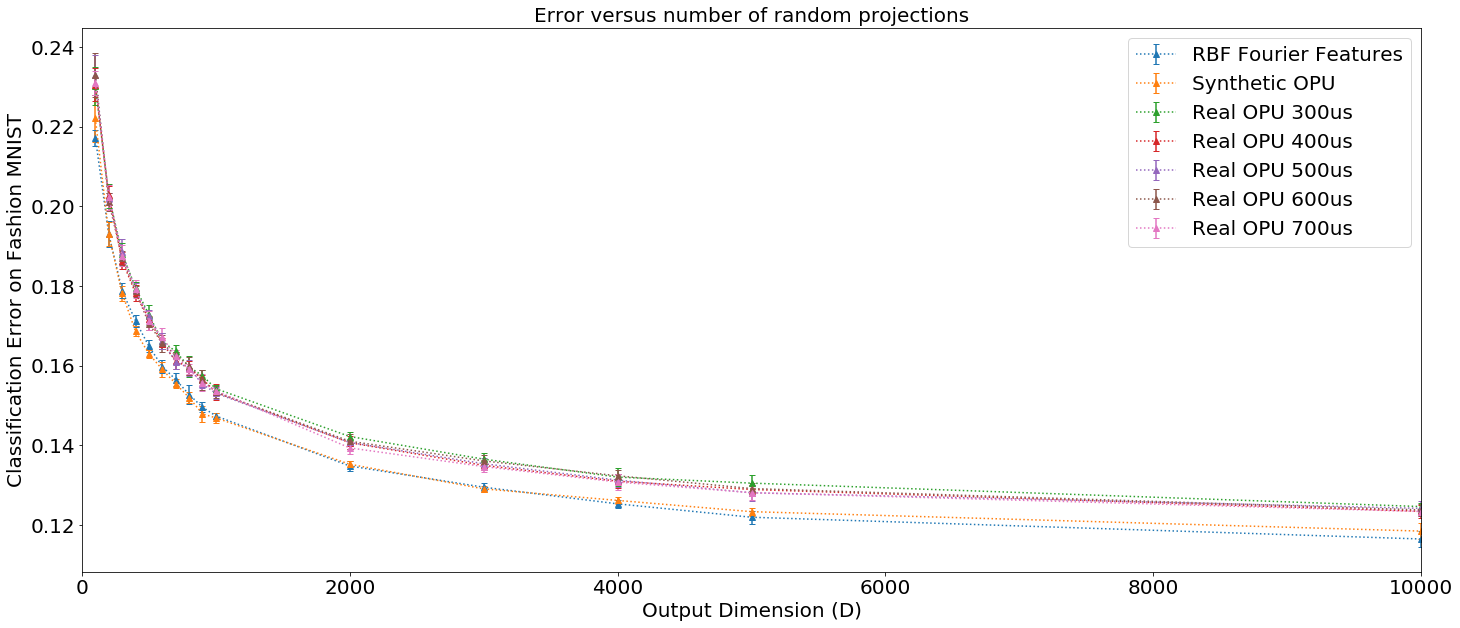

In [57]:
plot_misclassification_errors(
    [rbf_df_0, df_syn_1, df_opu_300, df_opu_400, df_opu_500, df_opu_600, df_opu_700],
    ['RBF Fourier Features', 'Synthetic OPU', 'Real OPU 300us', 'Real OPU 400us', 'Real OPU 500us', 'Real OPU 600us', 'Real OPU 700us']
)

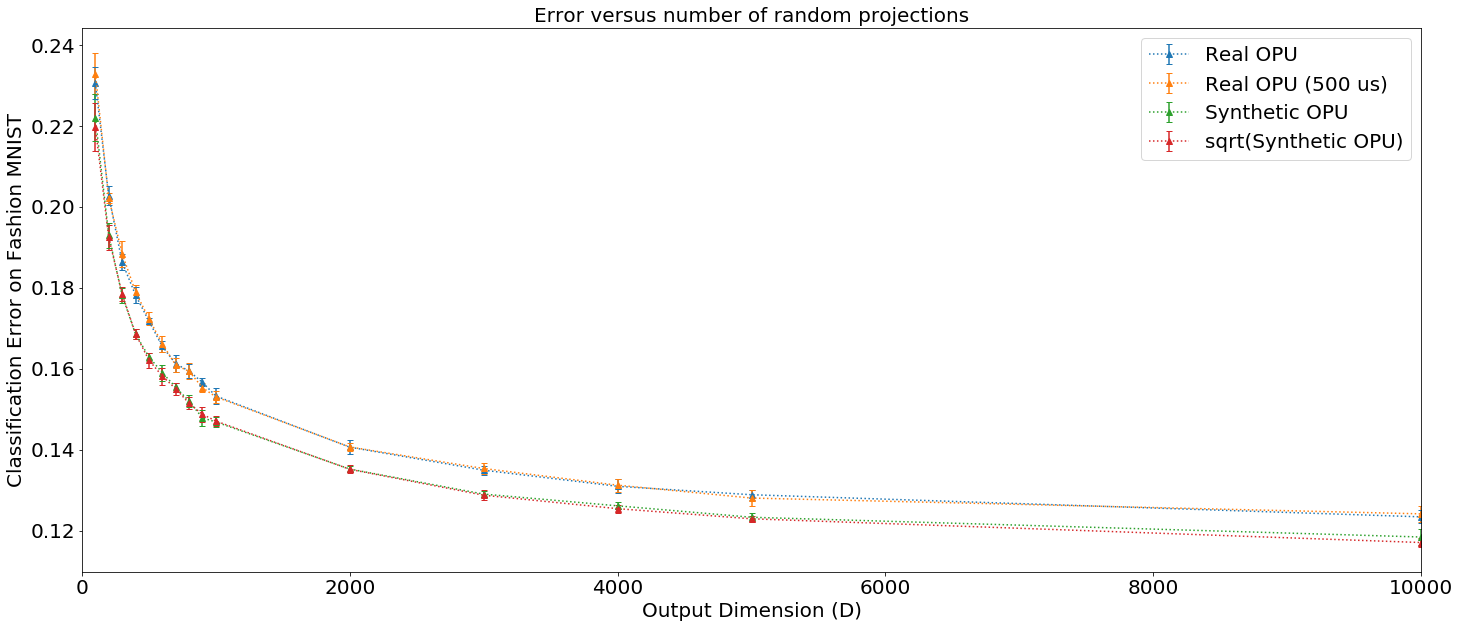

In [140]:
plot_misclassification_errors([df_1, df_3, df_syn, df_syn_2], ['Real OPU', 'Real OPU (500 us)', 'Synthetic OPU', 'sqrt(Synthetic OPU)'])
# plot_misclassification_errors([df_1, df_2, df_3, df_4, df_syn, df_syn_2], ['Real OPU', 'sqrt(Real OPU)', 'Real OPU (500 us)', 'Real OPU (dummy)', 'Synthetic OPU', 'sqrt(Synthetic OPU)'])

In [68]:
opu_df.query('output_dim == "10000.0"')

,activation,alpha,dummy_input,exposure_us,inversion_warning,output_dim,seed,test_score,training_time
230,NaN,0.00,1.0,400.0,1.0,10000.0,0.0,0.8744,24.632692
231,NaN,0.00,1.0,400.0,1.0,10000.0,1.0,0.8760,24.385024
232,NaN,0.00,1.0,400.0,1.0,10000.0,2.0,0.8753,24.201481
233,NaN,0.00,1.0,400.0,1.0,10000.0,3.0,0.8719,24.183566
234,NaN,0.00,1.0,400.0,1.0,10000.0,4.0,0.8768,24.118198
235,sqrt,0.00,1.0,400.0,1.0,10000.0,0.0,0.8762,25.940405
236,sqrt,0.00,1.0,400.0,1.0,10000.0,1.0,0.8743,26.300503
237,sqrt,0.00,1.0,400.0,1.0,10000.0,2.0,0.8733,25.018223
238,sqrt,0.00,1.0,400.0,1.0,10000.0,3.0,0.8708,25.080504
239,sqrt,0.00,1.0,400.0,1.0,10000.0,4.0,0.8747,25.144245
